In [1]:
#Import and process trip data
import os

#Data is stored as file names, so get file names from folder
path = "C://Users/helen/Downloads/ma_od_main_JT00_2022.csv"
dir_list = os.listdir(path)

In [2]:
#Make list of filenames into useful pandas dataframe
import pandas as pd

resBlock = []
workBlock = []
totJobs = []
under1250mon = []
between1251and3333mon = []
over3333mon = []
numTripsTot = len(dir_list) - 1
i = 0
while i < numTripsTot:
    txt = dir_list[i]
    els = txt.split(",")
    #print(type(els[0]))
    resBlock.append(int(els[0]))
    workBlock.append(int(els[1]))
    totJobs.append(int(els[2]))
    under1250mon.append(int(els[6]))
    between1251and3333mon.append(int(els[7]))
    over3333mon.append(int(els[8]))
    i = i + 1
dict = {"Home Census Block":resBlock,
"Work Census Block":workBlock,
"Total Jobs":totJobs,
"Jobs Earning at or Under 1250$/month":under1250mon,
"Jobs Earning Between 1251$ and 3333/month":between1251and3333mon,
"Jobs Earning Over 3333$/month":over3333mon}
allMATrips = pd.DataFrame(dict)

In [3]:
allMATrips = allMATrips.sort_values(by = 'Work Census Block')
allMATrips.reset_index(drop = True, inplace = True)

In [4]:
allMATrips.to_csv('MaTripData.csv')

sorted MA trip data by work census block and then used data in excel to find range indicies corresponding to blocks in boston, then sliced out these indicies to get only data pertaining to those who work in Boston

In [5]:
BostonTrips = allMATrips.iloc[169098:172405]

In [6]:
BostonTrips.reset_index(drop = True, inplace = True)

In [7]:
BostonTrips

,Home Census Block,Work Census Block,Total Jobs,Jobs Earning at or Under 1250$/month,Jobs Earning Between 1251$ and 3333/month,Jobs Earning Over 3333$/month
0,250010153001044,250250001011000,1,0,1,0
1,250056102032003,250250001011006,1,0,0,1
2,250010144021000,250250001011006,1,0,0,1
3,250010120021013,250250001012003,1,0,0,1
4,250056131003021,250250001012004,1,0,0,1
...,...,...,...,...,...,...
3302,250056002023000,250251805004006,1,0,0,1
3303,250056101001035,250251805004010,1,0,0,1
3304,250010153001037,250251805004019,1,1,0,0
3305,250010153001054,250259809001000,1,0,0,1


In [8]:
BostonTrips.to_csv('BostonTrips.csv')
sum(BostonTrips['Total Jobs'])

3318

In [9]:
#Get Census Boundary data
import pandas as pd
censusBoundaries = pd.read_csv("MassachussetsCensusTractData.csv")
censusBoundaries

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,ALAND20,AWATER20,INTPTLAT20,...,POP20,AREA_SQFT,AREA_ACRES,TOWN,TOWN_ID,BLKGRP20,TRACT20,COUSUBFP,SHAPE_AREA,SHAPE_LEN
0,25,13,813404,1013,250138134041013,Block 1013,G5040,52353.0,0.0,42.058580,...,69,563487.17,12.94,EAST LONGMEADOW,85,2.501380e+11,25013813404,19645,52349.880438,927.226421
1,25,13,813801,3027,250138138013027,Block 3027,G5040,14084.0,0.0,42.044617,...,3,151590.60,3.48,HOLLAND,135,2.501380e+11,25013813801,30665,14083.283764,497.512248
2,25,13,813101,3021,250138131013021,Block 3021,G5040,359076.0,0.0,42.055526,...,152,3864788.95,88.72,SOUTHWICK,279,2.501380e+11,25013813101,65825,359052.078256,2964.962009
3,25,13,813102,2016,250138131022016,Block 2016,G5040,174621.0,4672.0,42.048526,...,42,1929764.89,44.30,SOUTHWICK,279,2.501380e+11,25013813102,65825,179281.741552,3011.432727
4,25,13,813401,3046,250138134013046,Block 3046,G5040,40433.0,0.0,42.060986,...,46,435182.58,9.99,EAST LONGMEADOW,85,2.501380e+11,25013813401,19645,40429.946696,803.820105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106159,25,13,813701,1030,250138137011030,Block 1030,G5040,450129.0,0.0,42.053325,...,40,4844809.60,111.22,MONSON,191,2.501380e+11,25013813701,42145,450099.340235,6573.953212
106160,25,27,757200,3007,250277572003007,Block 3007,G5040,21587.0,0.0,42.068138,...,47,232339.18,5.33,SOUTHBRIDGE,278,2.502780e+11,25027757200,63345,21585.102193,824.867029
106161,25,13,813303,1015,250138133031015,Block 1015,G5040,23225.0,0.0,42.063102,...,34,249965.55,5.74,LONGMEADOW,159,2.501380e+11,25013813303,36300,23222.652194,685.709660
106162,25,13,813209,3025,250138132093025,Block 3025,G5040,156498.0,0.0,42.064721,...,110,1684413.70,38.67,AGAWAM,5,2.501380e+11,25013813209,840,156487.779685,1642.712551


In [10]:
#Use boundary data to center the start and end of each trip at a latitude and longitude
numBtrips = len(BostonTrips['Total Jobs'])
i = 0
homeLats = []
homeLongs = []
workLats = []
workLongs = []
while i < numBtrips:
    homeID = BostonTrips['Home Census Block'][i]
    workID = BostonTrips['Work Census Block'][i]
    homeLat = censusBoundaries[censusBoundaries['GEOID20'] == homeID]['INTPTLAT20'].item()
    homeLong = censusBoundaries[censusBoundaries['GEOID20'] == homeID]['INTPTLON20'].item()
    workLat = censusBoundaries[censusBoundaries['GEOID20'] == workID]['INTPTLAT20'].item()
    workLong = censusBoundaries[censusBoundaries['GEOID20'] == workID]['INTPTLON20'].item()
    homeLats.append(homeLat)
    homeLongs.append(homeLong)
    workLats.append(workLat)
    workLongs.append(workLong)
    i = i + 1

BostonTrips['Home Latitude'] = homeLats
BostonTrips['Home Longitude'] = homeLongs
BostonTrips['Work Latitude'] = workLats
BostonTrips['Work Longitude'] = workLongs

C:\Users\helen\AppData\Local\Temp\ipykernel_28716\1452782718.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BostonTrips['Home Latitude'] = homeLats
C:\Users\helen\AppData\Local\Temp\ipykernel_28716\1452782718.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BostonTrips['Home Longitude'] = homeLongs
C:\Users\helen\AppData\Local\Temp\ipykernel_28716\1452782718.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [11]:
BostonTrips

,Home Census Block,Work Census Block,Total Jobs,Jobs Earning at or Under 1250$/month,Jobs Earning Between 1251$ and 3333/month,Jobs Earning Over 3333$/month,Home Latitude,Home Longitude,Work Latitude,Work Longitude
0,250010153001044,250250001011000,1,0,1,0,41.666373,-70.288402,42.362176,-71.131667
1,250056102032003,250250001011006,1,0,0,1,42.020137,-71.216462,42.361242,-71.135182
2,250010144021000,250250001011006,1,0,0,1,41.607571,-70.610927,42.361242,-71.135182
3,250010120021013,250250001012003,1,0,0,1,41.664657,-70.199918,42.359659,-71.132353
4,250056131003021,250250001012004,1,0,0,1,41.955294,-71.136020,42.359948,-71.133845
...,...,...,...,...,...,...,...,...,...,...
3302,250056002023000,250251805004006,1,0,0,1,42.018470,-71.064476,42.359276,-70.973908
3303,250056101001035,250251805004010,1,0,0,1,42.029864,-71.228029,42.359560,-70.972912
3304,250010153001037,250251805004019,1,1,0,0,41.666128,-70.295886,42.359040,-70.970081
3305,250010153001054,250259809001000,1,0,0,1,41.681909,-70.291897,42.285395,-71.180189


In [12]:
import networkx as nx
commutes = nx.Graph()
i = 0
n = 1
numBTrips = len(BostonTrips['Total Jobs'])
while i < numBTrips:
    homePos = (BostonTrips['Home Latitude'][i], BostonTrips['Home Longitude'][i])
    workPos = (BostonTrips['Work Latitude'][i], BostonTrips['Work Longitude'][i])
    commutes.add_node(n, pos = homePos, loctype = 'Home', color = 'blue')
    commutes.add_node(n + 1, pos = workPos, loctype = 'Work', color = 'red')
    commutes.add_edge(n, n + 1)
    n = n + 2
    i = i + 1


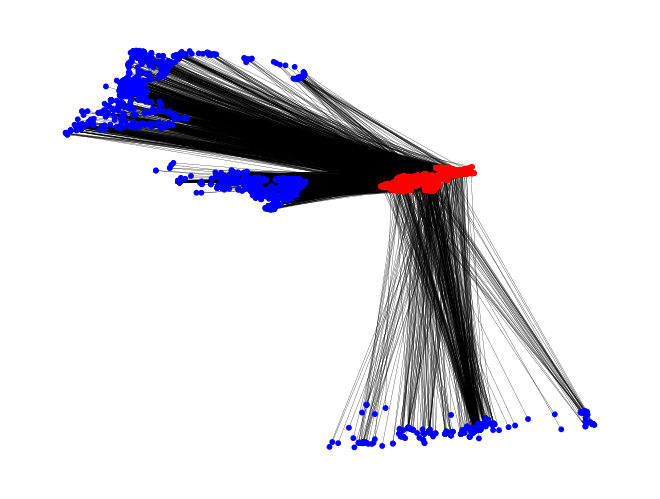

In [13]:
#referenced following stack overflow post to add basemap: https://stackoverflow.com/questions/44488167/plotting-lat-long-points-using-basemap
import matplotlib.pyplot as plt
pos = nx.get_node_attributes(commutes, 'pos')
colormap = nx.get_node_attributes(commutes, 'color')
nx.draw(commutes, pos, node_color = colormap.values(), node_size = 10, width = 0.2)

#Add basemap it possible

C:\Users\helen\AppData\Local\Programs\Python\Python313\Lib\site-packages\osmnx\_overpass.py:267: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


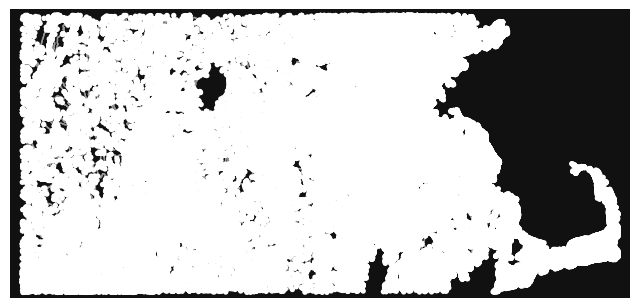

In [14]:
#Import network data
min_lat = min(BostonTrips['Home Latitude'].min(), BostonTrips['Work Latitude'].min())
max_lat = max(BostonTrips['Home Latitude'].max(), BostonTrips['Work Latitude'].max())
min_lon = min(BostonTrips['Home Longitude'].min(), BostonTrips['Work Longitude'].min())
max_lon = max(BostonTrips['Home Longitude'].max(), BostonTrips['Work Longitude'].min())
bbox = min_lon, min_lat, max_lon, max_lat
import osmnx as ox
place = "Massachusetts, USA"
Gp = ox.graph.graph_from_bbox(bbox, network_type="drive")
fig, ax = ox.plot.plot_graph(Gp)
Gp = ox.routing.add_edge_speeds(Gp)
Gp = ox.routing.add_edge_travel_times(Gp)

# 

In [19]:
#save networkx graph of roads with freeflow travel times
import pickle
with open("roadsWFreeFlow.gpickle", "wb") as file:
    pickle.dump(Gp, file)

In [14]:
import pickle
with open("roadsWFreeFlow.gpickle", "rb") as file:
    Gp = pickle.load(file)

In [15]:
#assign each trip origin and destination to the nearest node
import osmnx as ox
homeNodes = ox.distance.nearest_nodes(Gp, BostonTrips['Home Longitude'], BostonTrips['Home Latitude'], return_dist = False)
workNodes = ox.distance.nearest_nodes(Gp, BostonTrips['Work Longitude'], BostonTrips['Work Latitude'], return_dist = False)


BostonTrips["Home Node"] = homeNodes
BostonTrips["Work Node"] = workNodes

C:\Users\helen\AppData\Local\Temp\ipykernel_28716\1555983487.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BostonTrips["Home Node"] = homeNodes
C:\Users\helen\AppData\Local\Temp\ipykernel_28716\1555983487.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BostonTrips["Work Node"] = workNodes


In [16]:
BostonTrips

,Home Census Block,Work Census Block,Total Jobs,Jobs Earning at or Under 1250$/month,Jobs Earning Between 1251$ and 3333/month,Jobs Earning Over 3333$/month,Home Latitude,Home Longitude,Work Latitude,Work Longitude,Home Node,Work Node
0,250010153001044,250250001011000,1,0,1,0,41.666373,-70.288402,42.362176,-71.131667,68066894,61496669
1,250056102032003,250250001011006,1,0,0,1,42.020137,-71.216462,42.361242,-71.135182,65497375,61465992
2,250010144021000,250250001011006,1,0,0,1,41.607571,-70.610927,42.361242,-71.135182,67301072,61465992
3,250010120021013,250250001012003,1,0,0,1,41.664657,-70.199918,42.359659,-71.132353,75028865,61340050
4,250056131003021,250250001012004,1,0,0,1,41.955294,-71.136020,42.359948,-71.133845,69066438,61340395
...,...,...,...,...,...,...,...,...,...,...,...,...
3302,250056002023000,250251805004006,1,0,0,1,42.018470,-71.064476,42.359276,-70.973908,66337854,61338958
3303,250056101001035,250251805004010,1,0,0,1,42.029864,-71.228029,42.359560,-70.972912,65458537,1453951679
3304,250010153001037,250251805004019,1,1,0,0,41.666128,-70.295886,42.359040,-70.970081,67909690,9867214626
3305,250010153001054,250259809001000,1,0,0,1,41.681909,-70.291897,42.285395,-71.180189,67805653,61549518


In [17]:
import time
import random
from random import sample
random.seed(1952)
sampledIndicies = random.sample(list(range(0, 3307)), 300)
start_time = time.perf_counter()
freeflowroutes = ox.routing.shortest_path(Gp, BostonTrips['Home Node'][sampledIndicies], BostonTrips['Work Node'][sampledIndicies], weight = "travel_time")
end_time = time.perf_counter()
print(end_time - start_time)

798.6377246999982


In [ ]:
#import walking, biking, and bus route data
import requests
from requests.structures import CaseInsensitiveDict
random.seed(1952)
sampledIndicies = random.sample(list(range(0, 3307)), 300)
odNum = len(sampledIndicies)
modes = ['bicycle', 'walk']
sampled_BostonTrips = BostonTrips.iloc[sampledIndicies]
i = 0
bikeResp = []
walkResp = []
while i < odNum:
    orilatlon = str(sampled_BostonTrips['Home Latitude'].iloc[i]) + "%2C" + str(sampled_BostonTrips['Home Longitude'].iloc[i])
    destlatlon = "%7C" + str(sampled_BostonTrips['Work Latitude'].iloc[i]) + "%2C" + str(sampled_BostonTrips['Work Longitude'].iloc[i])
    urlstart = "https://api.geoapify.com/v1/routing?waypoints="
    waypoints = orilatlon + destlatlon + "&"
    apiKey = "&apiKey=ffa7ee04c823409ca33ccc4cd9dca117"
    a = 0
    while a < 2:
        mode = "mode=" + modes[a]
        url = urlstart + waypoints + mode + apiKey
        headers = CaseInsensitiveDict()
        headers["Accept"] = "application/json"
        resp = requests.get(url, headers=headers)
        if a == 0:
            bikeResp.append(resp.json())
        elif a == 1:
            walkResp.append(resp.json())
        a = a + 1
    i = i + 1

    

In [48]:
bikeTimes = []
walkTimes = []
i = 0
while i < odNum:
    if "features" in bikeResp[i]:
        bikeTimes.append(bikeResp[i]['features'][0]['properties']['time'])
    else:
        bikeTimes.append(10000000)
    if "features" in walkResp[i]:
        walkTimes.append(walkResp[i]['features'][0]['properties']['time'])
    else:
        walkTimes.append(10000000)
    i = i + 1

In [50]:
print(min(bikeTimes))

6092.189


In [52]:
#Get bus data using HERE public transit API
HereAPIKey = "sAKDAxmk-OzpZa-GF7ZcmEBNvRfL0aYKjI3PqqF3oPU"
urlBase = "https://transit.router.hereapi.com/v8/routes?"
restofurl = "departureTime=2025-05-15T07:23:45&changes=2&return=travelSummary,fares&apikey=" + HereAPIKey
i = 0
busRouteInfoUnpro = []
while i < odNum:
    homelat = sampled_BostonTrips["Home Latitude"].iloc[i]
    homelong = sampled_BostonTrips["Home Longitude"].iloc[i]
    worklat = sampled_BostonTrips["Work Latitude"].iloc[i]
    worklong = sampled_BostonTrips["Work Longitude"].iloc[i]
    originstr = "origin=" + str(homelat) + "," + str(homelong)
    deststr = "destination=" + str(worklat) + "," + str(worklong)
    url = urlBase + originstr + "&" + deststr + "&" + restofurl
    response = requests.get(url)
    info = response.json()
    busRouteInfoUnpro.append(info)
    i = i + 1



In [76]:
i = 0 
busTimes = []
from datetime import datetime
while i < odNum:
    if len(busRouteInfoUnpro[i]['routes']) > 0:
        dtformat = "%Y-%m-%d %H:%M:%S"
        busTimeUnpro = busRouteInfoUnpro[i]['routes'][0]['sections'][-1]['arrival']['time']
        busTimeInt = busTimeUnpro[0:10] +" " +  busTimeUnpro[11: 19]
        busTime = datetime.strptime(busTimeInt, dtformat) - datetime.strptime("2025-05-15 07:23:45", dtformat)
        busTimediff = busTime.total_seconds()
        busTimes.append(busTimediff)
    else:
        busTimes.append(10000000)
    i = i + 1


In [78]:

altdict = {'Walk Time': walkTimes, 'Bike Time': bikeTimes,'Bus Time': busTimes}
altTransitdf = pd.DataFrame(altdict)

In [80]:
altTransitdf.to_csv('altTransit.csv')

In [18]:
altTransitdf = pd.read_csv('altTransit.csv')
altTransitdf

,Unnamed: 0,Walk Time,Bike Time,Bus Time
0,0,1.000000e+07,48975.863,46215.0
1,1,3.486848e+04,8699.566,10000000.0
2,2,1.000000e+07,23703.517,15015.0
3,3,1.039422e+05,27458.460,10000000.0
4,4,9.210112e+04,25153.818,10000000.0
...,...,...,...,...
295,295,3.578214e+04,8859.937,11415.0
296,296,8.952305e+04,22623.972,10000000.0
297,297,5.316452e+04,12538.910,10635.0
298,298,2.852863e+04,6586.156,10000000.0


In [66]:
def find_route_distance_andTravelTime(G, odPairRoutes, iteration):
    nroutes = 300
    i = 0
    route_distances = []
    travel_times = []
    route_fuel_consumption = []
    route_electricity_consumption = []
    #https://www.statista.com/statistics/738667/us-vehicles-projected-age/#:~:text=The%20future%20market,next%20era%20of%20automotive%20technology.
    #https://www.boston.com/cars/car-culture/2018/09/12/most-popular-cars-in-boston/
    #https://motorweek.org/road_tests/2013_honda_accord/#:~:text=26%2DCity%2C%2035%2DHighway,for%20the%20V6%20with%20automatic.
    cmpg = 26 #mpg
    hmpg = 35 #mpg
    cspeedL = 21 #mph must convert

    #https://www.spglobal.com/mobility/en/research-analysis/average-age-vehicles-united-states-2024.html#:~:text=The%20average%20age%20of%20EVs%20in%20the%20US%20is%203.5,share%20of%20overall%20EV%20VIO.
    #https://www.kbb.com/nissan/leaf/2021/specs/
    #Used Leaf Hatchback 4D data
    cmpge = 123 #mpge
    hmpge = 99 #mpge
    while i < nroutes:
        subiteration = 0
        wdis = 0
        wtime = 0 
        wfuel = 0
        welec = 0
        while subiteration <= iteration:
            route = odPairRoutes[str(i)][str(subiteration)]['route']
            routeWeight = odPairRoutes[str(i)][str(subiteration)]['volprop']
            nnodes = len(route)
            dis = 0
            time = 0
            fuel = 0
            elec = 0
            a = 0
            while a < nnodes-1:
                dis = dis + G.edges[route[a], route[a + 1],0]['length'] /1609 #miles
                if 'actTravelTime' not in G.edges[route[a], route[a + 1],0]:
                    time = time + G.edges[route[a], route[a + 1],0]['travel_time'] #seconds
                    etime = G.edges[route[a], route[a + 1],0]['travel_time']
                else:
                    time = time + max(G.edges[route[a], route[a + 1],0]['actTravelTime'],G.edges[route[a], route[a + 1],0]['travel_time'])  #seconds
                    etime = max(G.edges[route[a], route[a + 1],0]['actTravelTime'],G.edges[route[a], route[a + 1],0]['travel_time'])
                if G.edges[route[a], route[a + 1],0]['actTravelTime'] == None:
                    print(G.edges[route[a], route[a + 1],0]['actTravelTime'])
                edis = G.edges[route[a], route[a + 1],0]['length'] /1609 
                speed = edis/(etime/3600) #mph
                #https://www.caranddriver.com/features/a15388892/the-truth-about-epa-city-highway-mpg-estimates/
                if edis/etime < cspeedL:
                    edgefuel = edis/cmpg
                    edgeElec = edis/cmpge
                else:
                    edgefuel = edis/hmpg
                    edgeElec = edis/cmpge
                fuel = fuel + edgefuel
                elec = elec + edgeElec
                a = a + 1
            wdis = dis * routeWeight
            wtime = time * routeWeight
            wfuel = fuel * routeWeight
            welec = elec * routeWeight
            subiteration = subiteration + 1
        route_distances.append(wdis) #miles
        travel_times.append(wtime) #seconds
        route_fuel_consumption.append(wfuel) #gallons
        route_electricity_consumption.append(welec) #gallon equivalents
        i = i + 1
    return route_distances, travel_times, route_fuel_consumption, route_electricity_consumption
        

In [67]:
(a, b, c) = list(Gp.edges)[0]
print(a)
Gp[a][b][0]['travel_time']

62263943


84.02441400567612

In [70]:
#agent choice function
def agentChoice(G, odpairsroutes, altTransit, gasTax, iteration, sampledBostonTrips):

    #find cost of gas and electric vehicle on routes including daily cost of ownership
    (_, travelTimes0, gasAmts0, elecAmts0) = find_route_distance_andTravelTime(G, odpairsroutes,iteration)
    timevals = []
    numODPairs = 300
    modeChoice = []
    cost0 = 0
    i = 0
    timeVals = []
    while i < numODPairs:
        #https://www.workstream.us/wage-index/massachusetts#:~:text=The%20current%20minimum%20wage%20in,wage%20of%20%247.25%20per%20hour.
        #https://housinganywhere.com/Boston--United-States/average-salary-boston
        #https://www.monitask.com/en/blog/how-many-work-hours-are-in-a-year-of-full-time-work
        if sampledBostonTrips['Jobs Earning Over 3333$/month'].iloc[i] >= 1:
            timeValue = 78.49/3600 #$/second
        elif sampledBostonTrips['Jobs Earning Between 1251$ and 3333/month'].iloc[i] >= 1:
            timeValue = (77771/2080)/3600 #$/second
        else:
            timeValue = (15/3600)
        timevals.append(timeValue)
        walkCost = altTransit["Walk Time"].iloc[i] * timeValue
        bikeCost = altTransit["Bike Time"].iloc[i] * timeValue
        
        #https://www.mbta.com/fares/bus-fares
        busCost = (altTransit["Bus Time"].iloc[i] * timeValue) + (1.70 * 2)

        #https://lifelanes.progressive.com/electric-car-maintenance/
        #https://www.kbb.com/nissan/leaf/2021/specs/
        #https://www.calculator.net/auto-loan-calculator.html?csaleprice=12%2C721&cmonthlypay=750&cloanterm=60&cinterestrate=5&cincentive=0&cdownpayment=0&ctradeinvalue=0&ctradeinowned=0&cstate=NY&csaletax=4&ctitlereg=2%2C200&cttrinloan=1&printit=0&ctype=standard&x=Calculate#autoloanresult
        elecCarDailyCost = ((900/365)/2) + (291.18/30)/2
        #https://poweroutage.us/electricity-rates/ma/boston#:~:text=Get%20Started-,Average%20cost%20of%20electricity%20in%20Boston%2C%20Massachusetts,uses%20544%20kWh%20per%20month.
        elecPrice = 0.2818 * 33.7 #$/
        elecCarCost = elecCarDailyCost + (travelTimes0[i] * timeValue) + (elecAmts0[i] * elecPrice)

        #https://www.wildfirecu.org/education-and-resources/blog/blog-post/wildfire-blog/cost-analysis-electric-vs.-gas-powered-cars#:~:text=According%20to%20a%20study%20done%20by%20AAA%2C,where%20with%20gas%20it%20costs%20about%20$1%2C279.
        iceCarDailyCost = (1279/365)/2
        #https://gasprices.aaa.com/?state=MA
        gasPrice = 2.974 #$/gallon
        totGasPrice = gasPrice + gasTax
        iceCarCost = iceCarDailyCost + (travelTimes0[i]* timeValue) + (gasAmts0[i] * totGasPrice)


        if walkCost < bikeCost and walkCost < busCost and walkCost < elecCarCost and walkCost < iceCarCost:
            choice = [1, 0 , 0, 0 , 0] 
        elif bikeCost < walkCost and bikeCost < busCost and bikeCost < elecCarCost and bikeCost < iceCarCost:
            choice = [0, 1, 0, 0, 0]
        elif busCost < walkCost and busCost < bikeCost and busCost < elecCarCost and busCost < iceCarCost:
            choice = [0, 0, 1, 0, 0]
        elif elecCarCost < walkCost and elecCarCost < bikeCost and elecCarCost < busCost and elecCarCost < iceCarCost:
            choice = [0 , 0, 0, 1, 0]
        else:
            choice = [0,0,0,0,1]
        
        modeChoice.append(choice)
        sample_weight = (400000 * 0.8)/(sum(sampledBostonTrips["Total Jobs"]) * 16)
        i = i + 1
    i = 0 
    cost0 = 0
    while i < numODPairs:
        elecCarDailyCost = ((900/365)/2) + (291.18/30)/2
        #https://poweroutage.us/electricity-rates/ma/boston#:~:text=Get%20Started-,Average%20cost%20of%20electricity%20in%20Boston%2C%20Massachusetts,uses%20544%20kWh%20per%20month.
        elecPrice = 0.2818 *33.7 
        #https://www.wildfirecu.org/education-and-resources/blog/blog-post/wildfire-blog/cost-analysis-electric-vs.-gas-powered-cars#:~:text=According%20to%20a%20study%20done%20by%20AAA%2C,where%20with%20gas%20it%20costs%20about%20$1%2C279.
        iceCarDailyCost = (1279/365)/2
        #https://gasprices.aaa.com/?state=MA
        gasPrice = 2.974 #$/gallon
        elecCarCost = elecCarDailyCost + (travelTimes0[i]* timevals[i]) + (elecAmts0[i] * elecPrice)
        totGasPrice = gasPrice + gasTax
        iceCarCost = iceCarDailyCost + (travelTimes0[i]* timevals[i]) + (gasAmts0[i] * totGasPrice)

        walkCost = altTransit["Walk Time"].iloc[i] * timevals[i]
        bikeCost = altTransit["Bike Time"].iloc[i] * timevals[i]
        
        #https://www.mbta.com/fares/bus-fares
        busCost = (altTransit["Bus Time"].iloc[i] * timevals[i]) + (1.70 * 2)
        cost0 = cost0 + ((((elecCarCost*modeChoice[i][3]) + (iceCarCost* modeChoice[i][4]) + (walkCost * modeChoice[i][0]) + (bikeCost * modeChoice[i][1]) + (busCost * modeChoice[i][2])) * sampledBostonTrips["Total Jobs"].iloc[i])) 
        i = i + 1
    #https://www.bostonfed.org/-/media/Documents/economic/neppc/labor-market-trends-in-massachusetts-regions/boston-metro-north/boston-metro-north20.pdf
    sample_weight = (400000 * 0.8)/(sum(sampledBostonTrips["Total Jobs"]) * 16)

    #if using car, assign volume to roads
    num_edges = len(G.edges)
    nx.set_edge_attributes(G, 0, 'volume')
    i = 0
    visited_edges = []
    subiteration = 0
    while i < numODPairs:
        while subiteration <= iteration:
            route = odpairsroutes[str(i)][str(iteration)]['route']
            nnodes = len(route)
            node = 0
            while node < nnodes -1:
                prevVol = G.edges[route[node], route[node + 1],0]['volume']
                addedVol = (odpairsroutes[str(i)][str(iteration)]['volprop']) * sampledBostonTrips['Total Jobs'].iloc[i] * sample_weight
                G[route[node]][route[node + 1]][0]['volume'] = prevVol + (addedVol * (modeChoice[i][3] + modeChoice[i][4]))
                node = node + 1
            subiteration = 1 + subiteration
        i = i + 1

    #Find new edge travel time for each edge
    edge = 0
    #https://www.carsguide.com.au/car-advice/whats-the-average-length-of-a-car-89454#:~:text=The%20average%20length%20of%20a%20small/compact%20SUV%20is%20about,pick%2Dup%20is%20about%206000mm.
    carlength = 4.4 #meters
    alpha = 0.15
    beta = 4
    edgesList = list(G.edges)
    while edge < num_edges:
        #get edge call
        (a, b, c) = edgesList[edge]
        edgeData = G[a][b][0]
        lanes = 1.5
        length = float(edgeData['length'])
        freeflowtime = float(edgeData['travel_time'])
        capacity = lanes * length/carlength
        volume = float(edgeData['volume'])
        actual_travel_time = max((freeflowtime * (1 + alpha*(volume/capacity)**beta)), freeflowtime)
        G[a][b][0]['actTravelTime'] = actual_travel_time
        if actual_travel_time == None:
            print(G[a][b][0]['actTravelTime'] - edgeData['travel_time'])
        if edge%100000 == 0:
            print(edge)
            print(num_edges)
        edge = edge + 1
    print('yay!')
    #return mode chosen, Gp, cost before reassignment, and cost after reassignment
    (_, travelTimes1, gasAmts1, elecAmts1) = find_route_distance_andTravelTime(G, odpairsroutes,iteration)
    i = 0 
    cost1 = 0
    while i < numODPairs:
        elecCarDailyCost = ((900/365)/2) + (291.18/30)/2
        #https://poweroutage.us/electricity-rates/ma/boston#:~:text=Get%20Started-,Average%20cost%20of%20electricity%20in%20Boston%2C%20Massachusetts,uses%20544%20kWh%20per%20month.
        elecPrice = 0.2818 * 33.7 #
        #https://www.wildfirecu.org/education-and-resources/blog/blog-post/wildfire-blog/cost-analysis-electric-vs.-gas-powered-cars#:~:text=According%20to%20a%20study%20done%20by%20AAA%2C,where%20with%20gas%20it%20costs%20about%20$1%2C279.
        iceCarDailyCost = (1279/365)/2
        #https://gasprices.aaa.com/?state=MA
        gasPrice = 2.974 #$/gallon
        elecCarCost = elecCarDailyCost + (travelTimes1[i]* timevals[i]) + (elecAmts1[i] * elecPrice)
        totGasPrice = gasPrice + gasTax
        iceCarCost = iceCarDailyCost + (travelTimes1[i]* timevals[i]) + (gasAmts1[i] * totGasPrice)

        walkCost = altTransit["Walk Time"].iloc[i] * timevals[i]
        bikeCost = altTransit["Bike Time"].iloc[i] * timevals[i]
        
        #https://www.mbta.com/fares/bus-fares
        busCost = (altTransit["Bus Time"].iloc[i] * timevals[i]) + (1.70 * 2)
        cost1 = cost1 + ((((elecCarCost*modeChoice[i][3]) + (iceCarCost* modeChoice[i][4]) + (walkCost * modeChoice[i][0]) + (bikeCost * modeChoice[i][1]) + (busCost * modeChoice[i][2])) * sampledBostonTrips["Total Jobs"].iloc[i])) 
        i = i + 1
    
    #print(cost1 - cost0)
    return modeChoice, G, cost0, cost1



In [71]:
def findequilibrium(freeflowroutes, G, sampled_BostonTrips, gasTax, altTransit, maxIT):
    odPairsRoutes = {}
    #First key is index of od pair
    #Second level key is route number
    #3rd level key is choice between route(as list of nodes) or proportion of volume on route (out of 1)
    #initialize freeflow od routes in dictionary
    iteration = 0
    numRoutes = len(freeflowroutes)
    i = 0
    while i < numRoutes:
        odPairsRoutes[str(i)] = {}
        odPairsRoutes[str(i)][str(iteration)] = {}
        odPairsRoutes[str(i)][str(iteration)] = {'route': freeflowroutes[i], 'volprop': 1}
        i = i + 1
    #call agent choice function
    (chosenMode, G, cost0, cost1) = agentChoice(G, odPairsRoutes, altTransit, gasTax, 0, sampled_BostonTrips)
    costInc = (cost1 - cost0)/cost0
    #print(iteration)
    #print(costInc)
    iteration = iteration + 1
    #Further iterations until convergence
    while iteration < maxIT:
        shortest_routes = ox.routing.shortest_path(G, sampled_BostonTrips['Home Node'], sampled_BostonTrips['Work Node'], weight = "actTravelTime")
        i = 0
        while i < numRoutes:
            odPairsRoutes[str(i)][str(iteration)] = {}
            l = 1/(iteration + 1)
            odPairsRoutes[str(i)][str(iteration)] = {'route': shortest_routes[i], 'volprop': l}
            subiteration = 0
            while subiteration < iteration:
                odPairsRoutes[str(i)][str(subiteration)]['volprop'] = (odPairsRoutes[str(i)][str(subiteration)]['volprop'])/(iteration + 1)
                subiteration = subiteration + 1
            i = i + 1
        (chosenMode, G, cost0, cost1) = agentChoice(G, odPairsRoutes, altTransit, gasTax, iteration, sampled_BostonTrips)
        costInc = (cost1 - cost0)/cost0
        #print(iteration)
        #print(costInc)
        iteration = iteration + 1
        
    return cost0, cost1, odPairsRoutes, chosenMode, G

In [72]:
random.seed(1952)
sampledIndicies = random.sample(list(range(0, 3307)), 300)
odNum = len(sampledIndicies)
modes = ['bicycle', 'walk']
sampled_BostonTrips = BostonTrips.iloc[sampledIndicies]
import numpy as np
[_, _, notaxodPairRoutes, notaxmodechoice, Gnotax] = findequilibrium(freeflowroutes, Gp, sampled_BostonTrips, 0, altTransitdf, 3)

0
872723
100000
872723
200000
872723
300000
872723
400000
872723
500000
872723
600000
872723
700000
872723
800000
872723
yay!
0
872723
100000
872723
200000
872723
300000
872723
400000
872723
500000
872723
600000
872723
700000
872723
800000
872723
yay!
0
872723
100000
872723
200000
872723
300000
872723
400000
872723
500000
872723
600000
872723
700000
872723
800000
872723
yay!


In [73]:
[_, _, taxodPairRoutes, taxmodechoice, Gtax] = findequilibrium(freeflowroutes, Gp, sampled_BostonTrips, 2.67, altTransitdf, 3)

0
872723
100000
872723
200000
872723
300000
872723
400000
872723
500000
872723
600000
872723
700000
872723
800000
872723
yay!
0
872723
100000
872723
200000
872723
300000
872723
400000
872723
500000
872723
600000
872723
700000
872723
800000
872723
yay!
0
872723
100000
872723
200000
872723
300000
872723
400000
872723
500000
872723
600000
872723
700000
872723
800000
872723
yay!


In [74]:
[_, _, halftaxodPairRoutes, halftaxmodechoice, halfGtax] = findequilibrium(freeflowroutes, Gp, sampled_BostonTrips, 2.67/2, altTransitdf, 3)

0
872723
100000
872723
200000
872723
300000
872723
400000
872723
500000
872723
600000
872723
700000
872723
800000
872723
yay!
0
872723
100000
872723
200000
872723
300000
872723
400000
872723
500000
872723
600000
872723
700000
872723
800000
872723
yay!
0
872723
100000
872723
200000
872723
300000
872723
400000
872723
500000
872723
600000
872723
700000
872723
800000
872723
yay!


In [75]:
#save data

#Save graphs
with open('notaxgraph.gpickle', 'wb') as file:
    pickle.dump(Gnotax, file)
    
with open('fulltaxgraph.gpickle', 'wb') as file:
    pickle.dump(Gtax, file)

with open('halftaxgraph.gpickle', 'wb') as file:
    pickle.dump(halfGtax, file)

#save mode choice
with open('notaxModeChoice.gpickle', 'wb') as file:
    pickle.dump(notaxmodechoice, file)
with open('fulltaxModeChoice.gpickle', 'wb') as file:
    pickle.dump(taxmodechoice, file)
with open('halftaxModeChoice.gpickle', 'wb') as file:
    pickle.dump(halftaxmodechoice, file)
    
#save od route dicts
with open('notaxODRoutes.gpickle', 'wb') as file:
    pickle.dump(notaxodPairRoutes, file)
with open('taxODRoutes.gpickle', 'wb') as file:
    pickle.dump(taxodPairRoutes, file)
with open('halftaxODRoutes.gpickle', 'wb') as file:
    pickle.dump(halftaxodPairRoutes, file)

In [82]:
#Open data
#open graphs
with open('notaxgraph.gpickle', 'rb') as file:
    Gnt = pickle.load(file)
    
with open('fulltaxgraph.gpickle', 'rb') as file:
    Gft = pickle.load(file)

with open('halftaxgraph.gpickle', 'rb') as file:
    Ght = pickle.load(file)

#open mode choice
with open('notaxModeChoice.gpickle', 'rb') as file:
    MCnt = pickle.load(file)
with open('fulltaxModeChoice.gpickle', 'rb') as file:
    MCft = pickle.load(file)
with open('halftaxModeChoice.gpickle', 'rb') as file:
    MCht = pickle.load(file)
    
#open od route dicts
with open('notaxODRoutes.gpickle', 'rb') as file:
    Rnt = pickle.load(file)
with open('taxODRoutes.gpickle', 'rb') as file:
    Rft = pickle.load(file)
with open('halftaxODRoutes.gpickle', 'rb') as file:
    Rht = pickle.load(file)

In [98]:
def evaluateObjectives(odPairRoutes, modeChoice, G, gasTax):



    #https://www.statista.com/statistics/738667/us-vehicles-projected-age/#:~:text=The%20future%20market,next%20era%20of%20automotive%20technology.
    #https://www.boston.com/cars/car-culture/2018/09/12/most-popular-cars-in-boston/
    #https://motorweek.org/road_tests/2013_honda_accord/#:~:text=26%2DCity%2C%2035%2DHighway,for%20the%20V6%20with%20automatic.
    cmpg = 26 #mpg
    hmpg = 35 #mpg
    cspeedL = 21 #mph must convert

    #https://www.spglobal.com/mobility/en/research-analysis/average-age-vehicles-united-states-2024.html#:~:text=The%20average%20age%20of%20EVs%20in%20the%20US%20is%203.5,share%20of%20overall%20EV%20VIO.
    #https://www.kbb.com/nissan/leaf/2021/specs/
    #Used Leaf Hatchback 4D data
    cmpge = 123 #mpge
    hmpge = 99 #mpge
    
    #iterate through each od route pair
    i = 0
    pairNum = len(odPairRoutes)
    commutesCost = []
    commutesTime = []
    commutesGas = []
    commutesElec = []
    walks = []
    bikes = []
    buses = []
    ecs = []
    ices = []
    while i < pairNum:
        #determine mode choices
        choices = modeChoice[i]
        bike = choices[1]
        walk = choices[0]
        bus = choices[2]
        ecs = choices[3]
        ices = choices[4]

        #initialize relavant variables
        cost = 0
        elec = 0
        gas = 0
        time = 0
        
        routes = odPairRoutes[str(i)]
        nroutes = len(routes)
        j = 0
        while j < nroutes:
            routeInfo = routes[str(j)]
            route = routeInfo['route']
            rWeight = routeInfo['volprop']
            nnodes = len(route)
            k = 0
            rTime = 0
            rgas = 0
            relec = 0
            while k < nnodes - 1:
                sNode = route[k]
                dNode = route[k+1]
                edgeInfo = G[sNode][dNode][0]
                eLength = edgeInfo['length']
                eTravelTime = max(edgeInfo['travel_time'], edgeInfo['actTravelTime'])
                rTime = rTime + eTravelTime

                #determine if highway speed
                speed = eLength/(eTravelTime/3600) #mph
                #https://www.caranddriver.com/features/a15388892/the-truth-about-epa-city-highway-mpg-estimates/
                if speed < cspeedL:
                    edgefuel = eLength/cmpg
                    edgeElec = eLength/cmpge
                else:
                    edgefuel = eLength/hmpg
                    edgeElec = eLength/cmpge
                relec = relec + edgeElec
                rgas = rgas + edgefuel
                k = k + 1
                
            time = time + (rWeight * rTime)
            elec = elec + (rWeight * relec)
            gas = gas + (rWeight * rgas)
            
                

                
            j = j + 1


        #add data to lists
        gas = gas * ices
        elec = elec * ecs
        gasPrice = 2.974 #$/gallon
        elecCarDailyCost = ((900/365)/2) + (291.18/30)/2
        #https://poweroutage.us/electricity-rates/ma/boston#:~:text=Get%20Started-,Average%20cost%20of%20electricity%20in%20Boston%2C%20Massachusetts,uses%20544%20kWh%20per%20month.
        eleccost = 0.2818 * 33.7 #$/Ge
        #https://www.wildfirecu.org/education-and-resources/blog/blog-post/wildfire-blog/cost-analysis-electric-vs.-gas-powered-cars#:~:text=According%20to%20a%20study%20done%20by%20AAA%2C,where%20with%20gas%20it%20costs%20about%20$1%2C279.
        iceCarDailyCost = (1279/365)/2
        totgascost = gasPrice + gasTax
        dailycarcost = (ices * iceCarDailyCost) + (ecs * elecCarDailyCost)
        cost = (gas * totgascost) + (elec * eleccost) + (bus * 1.7*2) + dailycarcost
        commutesCost.append(cost)
        commutesTime.append(time)
        commutesGas.append(gas)
        commutesElec.append(elec)
        i = i + 1
    return commutesCost, commutesTime, commutesGas, commutesElec, walks, bikes, buses, ices, ecs

In [99]:
#create dataframe
(ntcommutesCost, ntcommutesTime, ntcommutesGas, ntcommutesElec, ntbikes, ntwalks, ntbuses,ntices, ntecs) = evaluateObjectives(Rnt, MCnt, Gnt, 0)
(ftcommutesCost, ftcommutesTime, ftcommutesGas, ftcommutesElec, ftbikes, ftwalks, ftbuses,ftices, ftecs) = evaluateObjectives(Rft, MCft, Gft, 0)
(htcommutesCost, htcommutesTime, htcommutesGas, htcommutesElec, htbikes, htwalks, htbuses,htices, htecs) = evaluateObjectives(Rht, MCht, Ght, 0)
dfdict = {'Total Jobs':list(sampled_BostonTrips['Total Jobs']), 'Jobs Earning at or Under 1250$/month':list(sampled_BostonTrips['Jobs Earning at or Under 1250$/month']), 
          'Jobs Earning Between 1251$ and 3333/month':list(sampled_BostonTrips['Jobs Earning Between 1251$ and 3333/month']), 
          'Jobs Earning Over 3333$/month':list(sampled_BostonTrips['Jobs Earning Over 3333$/month']),
         'No Tax Commute Cost': ntcommutesCost,
         'No Tax Commute Time': ntcommutesTime,
         'Full Tax Commute Time': ftcommutesTime,
         'Full Tax Commute Cost': ftcommutesCost,
         'Half Tax Commute Cost': htcommutesCost,
         'Half Tax Commute Time': htcommutesTime}
df = pd.DataFrame(dfdict)
df

,Total Jobs,Jobs Earning at or Under 1250$/month,Jobs Earning Between 1251$ and 3333/month,Jobs Earning Over 3333$/month,No Tax Commute Cost,No Tax Commute Time,Full Tax Commute Time,Full Tax Commute Cost,Half Tax Commute Cost,Half Tax Commute Time
0,1,0,1,0,12799.609293,26407.796926,16591.281667,11588.288172,12799.609293,26407.796926
1,1,0,0,1,2332.295633,1301.772773,1301.772773,2332.295633,2332.295633,1301.772773
2,1,0,1,0,6624.198009,3266.561804,3266.561804,6624.198009,6624.198009,3266.561804
3,1,0,1,0,6823.191322,3380.253043,3380.253043,6823.191322,6823.191322,3380.253043
4,1,0,0,1,5814.506857,2806.149991,2806.149991,5814.506857,5814.506857,2806.149991
...,...,...,...,...,...,...,...,...,...,...
295,1,0,1,0,2826.793507,1392.166999,1392.166999,2826.793507,2826.793507,1392.166999
296,1,0,0,1,6318.055352,2931.271398,2931.271398,6318.055352,6318.055352,2931.271398
297,1,0,0,1,3829.610214,1866.090240,1866.090240,3829.610214,3829.610214,1866.090240
298,1,0,0,1,1802.699527,934.436264,934.436264,1802.699527,1802.699527,934.436264


In [103]:
df.to_csv('finalData.csv')


In [104]:
print(sum(ntcommutesGas))
print(sum(ftcommutesGas))
print(sum(htcommutesGas))

537149.3784370458
373887.8184103271
532310.5067403304
